In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data

In [13]:
import os

data = pd.DataFrame(columns=["mode", "model", "score"])
dir_path = os.path.join("results")
file_names = os.listdir(dir_path)
file_names = [name for name in file_names if name.endswith(".txt")]
for name in file_names:
    [mode, model, _] = name.split("_")
    mode = mode.capitalize()
    path = os.path.join(dir_path, name)
    with open(path) as f:
        score = f.readline().strip()
    data.loc[len(data)] = {"mode": mode, "model": model, "score": score}
data['score'] = data['score'].astype(float)
# change mode name from Zero to Knowledge-Free, from Knowledge-Based
data['mode'] = data['mode'].replace("Zero", "Knowledge-Free")
data['mode'] = data['mode'].replace("Finite", "Knowledge-Based")
data

,mode,model,score
0,Knowledge-Free,mistral:7b-instruct,40.000000
1,Knowledge-Based,gemma:7b-instruct,22.333333
2,Knowledge-Based,llama3:70b-instruct,36.000000
3,Knowledge-Based,phi3:3.8b-instruct,12.666667
4,Knowledge-Based,gpt-3.5-turbo,31.333333
5,Knowledge-Free,gpt-3.5-turbo,36.666667
6,Knowledge-Free,qwen:72b-chat,37.333333
7,Knowledge-Based,qwen:72b-chat,30.333333
8,Knowledge-Free,gpt-4o,56.666667
9,Knowledge-Based,mistral:7b-instruct,38.333333


# Plot

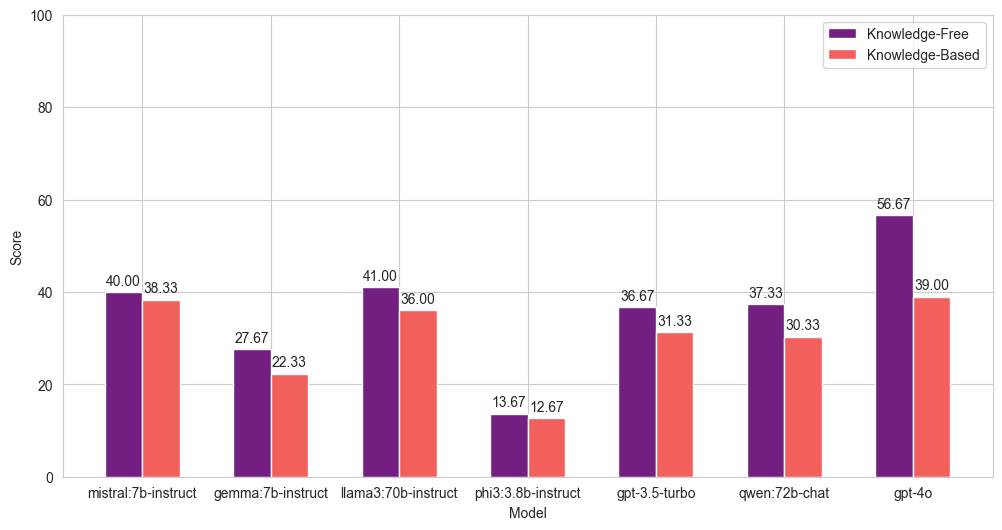

In [14]:
def plot_scores(df):
    # Get unique models and modes
    models = df['model'].unique()
    modes = sorted(df['mode'].unique(), key=lambda x: '0' if x == 'Knowledge-Free' else x)

    # Prepare the data for plotting
    scores = {mode: df[df['mode'] == mode].set_index('model')['score'] for mode in modes}

    bar_width = 0.35
    group_width = bar_width * len(modes) + 0.5
    index = np.arange(len(models)) * group_width

    fig, ax = plt.subplots(figsize=(12, 6))

    palette = sns.color_palette("magma", len(modes))

    # Plot each mode as separate bars
    for i, mode in enumerate(modes):
        bars = ax.bar(index + i * bar_width, scores[mode][models], bar_width, label=mode, color=palette[i])
        # Annotate bars with their values
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Setting labels
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 100)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models, rotation=0, ha='center')
    ax.legend()

    plt.show()


plot_scores(data)

# More 

In [15]:
mode_group_scores = data.groupby("mode")["score"].mean().reset_index()
mode_group_scores

,mode,score
0,Knowledge-Based,30.000000
1,Knowledge-Free,36.142857


In [16]:
score_difference = mode_group_scores.loc[mode_group_scores["mode"] == "Knowledge-Free", "score"].values[0] - mode_group_scores.loc[mode_group_scores["mode"] == "Knowledge-Based", "score"].values[0]
score_difference

6.142857142857146